In [71]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [72]:
#Train and Validation Data Path
x_train_path='/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_train/seg_train'
x_test_path='/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_test/seg_test'

In [73]:
#Loading the base model with pre-trained weights
base_model=keras.applications.InceptionV3(
    include_top=False,weights='imagenet',input_shape=(299,299,3)
)

In [74]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [75]:
#Freezing the weights of base model
base_model.trainable=False

In [76]:
#Creating custom layers

#Input layer,because the first layer of the base model is absent
input_layer=keras.Input(shape=(299,299,3))
#Passing the input layers to the base model
x=base_model(input_layer,training=False)
#Flattening the dim using global average pooling
x=keras.layers.GlobalAveragePooling2D()(x)
#Output layer
output=keras.layers.Dense(units=3,activation='softmax')(x)
model_v3=keras.Model(input_layer,output)

In [77]:
#Model summary
model_v3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 21,808,931
Trainable params: 6,147
Non-trainable params: 21,802,784
_________________________________________________________________


In [78]:
#Compiling the model
model_v3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
#Image Agumentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    horizontal_flip=True,
    rescale=1./255
)
test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [80]:
#Applying the image agumentation to training data
train_data=train_datagen.flow_from_directory(directory=x_train_path,target_size=(299,299),color_mode='rgb',
                                             batch_size=32,class_mode='categorical',
                                             save_to_dir='/content/drive/MyDrive/int')

Found 6840 images belonging to 3 classes.


In [81]:
#Applying image Agumentation to test data
test_data=test_datagen.flow_from_directory(directory=x_test_path,target_size=(299,299),
                                           color_mode='rgb',batch_size=32)

Found 1459 images belonging to 3 classes.


In [82]:
#Compiling the model
model_hist=model_v3.fit(train_data,epochs=20,validation_data=test_data,steps_per_epoch=15,validation_steps=5)

Epoch 1/20
15/15 [==============================] - 123s 8s/step - loss: 0.6733 - accuracy: 0.7563 - val_loss: 0.2500 - val_accuracy: 0.9625
Epoch 2/20
15/15 [==============================] - 106s 7s/step - loss: 0.1582 - accuracy: 0.9854 - val_loss: 0.1257 - val_accuracy: 0.9563
Epoch 3/20
15/15 [==============================] - 102s 7s/step - loss: 0.1313 - accuracy: 0.9688 - val_loss: 0.0699 - val_accuracy: 0.9812
Epoch 4/20
15/15 [==============================] - 95s 6s/step - loss: 0.1018 - accuracy: 0.9708 - val_loss: 0.0888 - val_accuracy: 0.9688
Epoch 5/20
15/15 [==============================] - 93s 6s/step - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 6/20
15/15 [==============================] - 81s 5s/step - loss: 0.0627 - accuracy: 0.9812 - val_loss: 0.0802 - val_accuracy: 0.9812
Epoch 7/20
15/15 [==============================] - 81s 5s/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 8/20
15/15 

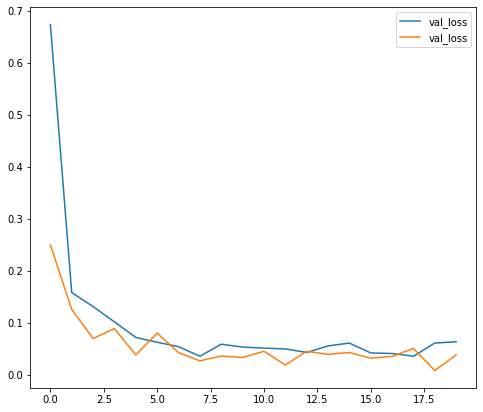

In [83]:
#Plotting the loss
plt.figure(figsize=(8,7))
plt.plot(model_hist.history['loss'],label='val_loss')
plt.plot(model_hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [84]:
#Testing the model with custom image
img_path='/content/drive/MyDrive/Colab Notebooks/intel image classification/seg_pred/seg_pred/12962.jpg'

[[1.9622332e-01 4.6976444e-07 8.0377620e-01]]


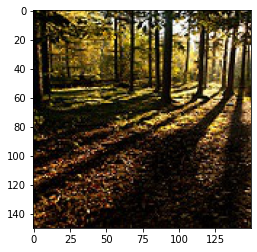

In [85]:
#Displaying the loaded image
def img_show(img_path):
  img=load_img(img_path)
  plt.imshow(img)

#Making predictions from the trained model
def img_prediction(img_path):
  img=load_img(img_path,target_size=(299,299))
  img_arr=img_to_array(img)
  img_arr2=img_arr.reshape(1,299,299,3)
  predictions=model_v3.predict(img_arr2)
  return predictions

print(img_prediction(img_path))
img_show(img_path)

In [1]:
#The model can be further hypertuned by unfreezing all the layers and using a very small learning rate 0.000001
#to train the complete model 